## STEP 1: COLLECT DATA

Load libraries

In [166]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score
#from causalinference import CausalModel


Load data

In [167]:
df = pd.read_csv(r'data\Spark_vyborka_kompaniy_20230318_1520_1 (1).csv')
df['Conflict'] = df['Conflict']==1
df['Size_company']=df['Size_company']==0
df['T']=df['T']==0
df

,№,Name,Reg_number,Name_Full,Company_year,Size_company,Conflict,T,Capital,Clr,Returns,Ndter,Rddta,Total_debt
0,1,"( КОЛХОЗ ) ИМ. КИРОВА ., СПК",1030000000000.00,СЕЛЬСКОХОЗЯЙСТВЕННЫЙ ПРОИЗВОДСТВЕННЫЙ КООПЕРАТ...,25.00,True,False,False,74299000,7.50,0.12,0.01,NaN,10985000.00
1,1,"( КОЛХОЗ ) ИМ. КИРОВА ., СПК",1030000000000.00,СЕЛЬСКОХОЗЯЙСТВЕННЫЙ ПРОИЗВОДСТВЕННЫЙ КООПЕРАТ...,25.00,True,False,True,68168000,6.67,0.05,0.05,NaN,13156000.00
2,2,"(АО), КРОО",1120000000000.00,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОРПОРАЦИЯ РАЗВИТИЯ ОРЕН...",12.00,True,False,False,439447000,1.00,-30.32,-0.07,0.02,66112000.00
3,2,"(АО), КРОО",1120000000000.00,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОРПОРАЦИЯ РАЗВИТИЯ ОРЕН...",12.00,True,False,True,486726000,1.60,-1.91,-0.00,0.16,160965000.00
4,6,"(КОЛХОЗ) ИМ. ЛЕНИНА, СПК",1030000000000.00,СЕЛЬСКОХОЗЯЙСТВЕННЫЙ ПРОИЗВОДСТВЕННЫЙ КООПЕРАТ...,23.50,True,False,True,61342000,3.87,0.00,0.12,0.03,10023000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,2498,"АГК, ООО",1140000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЗНА...",8.50,True,False,False,9496000,1.09,0.20,-0.22,0.42,16128000.00
2838,2498,"АГК, ООО",1140000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЗНА...",8.50,True,False,True,2503000,1.33,0.21,-1.47,0.35,10612000.00
2839,2499,"АГК, ООО",1090000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АМУР...",13.00,False,False,False,-31687000,NaN,NaN,NaN,NaN,35187000.00
2840,2500,"АГК-1, ООО",1170000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЛЬТ...",6.50,True,False,False,6089094000,0.91,-0.56,0.26,0.06,9408048000.00


Clearing data

In [168]:
df = df.filter(['Company_year', 'Conflict', 'Size_company', 'T','Capital','Clr','Returns','Ndter','Reddta','Total_debt']).dropna().reset_index(drop=True)
df

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt
0,25.00,False,True,False,74299000,7.50,0.12,0.01,10985000.00
1,25.00,False,True,True,68168000,6.67,0.05,0.05,13156000.00
2,12.00,False,True,False,439447000,1.00,-30.32,-0.07,66112000.00
3,12.00,False,True,True,486726000,1.60,-1.91,-0.00,160965000.00
4,23.50,False,True,True,61342000,3.87,0.00,0.12,10023000.00
...,...,...,...,...,...,...,...,...,...
2595,5.00,False,True,True,161000,0.90,0.01,-5.75,14381000.00
2596,8.50,False,True,False,9496000,1.09,0.20,-0.22,16128000.00
2597,8.50,False,True,True,2503000,1.33,0.21,-1.47,10612000.00
2598,6.50,False,True,False,6089094000,0.91,-0.56,0.26,9408048000.00


In [169]:
Conflict = 'Conflict'
Returns = 'Returns'
df.groupby(Conflict)[Returns].describe()

,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,2464.00,-0.67,18.22,-851.00,0.00,0.04,0.11,1.00
True,136.00,0.12,0.21,-1.03,0.02,0.07,0.18,1.00


Create plot (Company year)

In [170]:
df[df[Conflict]]

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt
62,10.50,True,True,False,20000,1.09,0.07,-1.50,230000.00
63,10.50,True,True,True,370000,1.90,0.06,-0.11,410000.00
165,23.50,True,True,False,16924000,3.33,0.50,-0.21,1854000.00
166,23.50,True,True,True,18933000,3.09,0.45,-0.15,1605000.00
294,4.00,True,True,False,42000,3.72,0.07,7.26,412000.00
...,...,...,...,...,...,...,...,...,...
2385,7.00,True,True,False,-1796000,0.82,-0.11,0.00,10078000.00
2427,9.50,True,True,True,15607000,5.59,0.02,-0.06,2995000.00
2428,9.50,True,True,False,12920000,1.49,0.01,-0.12,23890000.00
2429,17.00,True,True,False,18883000,0.11,0.54,1.83,47592000.00


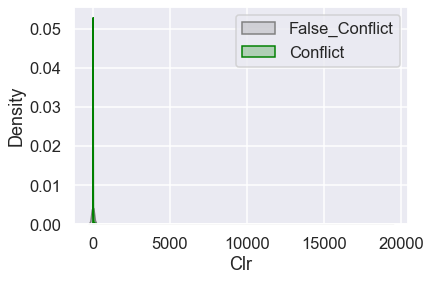

In [171]:
C_COLOUR = 'grey'
T_COLOUR = 'green'
C_LABEL = 'False_Conflict'
T_LABEL = 'Conflict'
sns.kdeplot(data=df[~df[Conflict]], x='Clr', shade=True,
            color=C_COLOUR, label=C_LABEL)
sns.kdeplot(data=df[df[Conflict]], x='Clr', shade=True,
            color=T_COLOUR, label=T_LABEL)
plt.legend();

The Conflict group has more younger company compared to the False_Conflict

Create bar plot (Size company)

In [172]:
F_COLOUR = 'magenta'
M_COLOUR = 'blue'
F_LABEL = 'Macro'
M_LABEL = 'Micro'
size_company = 100 * pd.crosstab(df[Conflict].replace({True: T_LABEL,
                                                        False: C_LABEL}),
                                 df['Size_company'].replace({True: 'Macro',
                                                             False: 'Micro'}),
                                 normalize='index')
size_company['All'] = 100

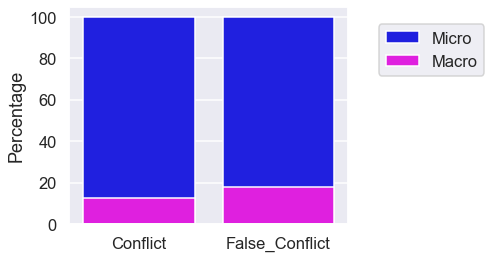

In [173]:

plt.figure(figsize=(5, 4))
sns.barplot(data=size_company, x=size_company.index.astype(str),  y="All",
            color=M_COLOUR, label=M_LABEL)
sns.barplot(data=size_company, x=size_company.index.astype(str),  y='Micro',
            color=F_COLOUR, label=F_LABEL)
plt.legend(loc='center', bbox_to_anchor=(1.3, 0.8))
plt.xlabel('')
plt.ylabel('Percentage');

More in micro company

## STEP 2: ESTIMATE PROPENSITY SCORES


Build a descriptive model

In [174]:
t = df[Conflict]
X = pd.get_dummies(df.drop(columns=[Returns, Conflict]))
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_classifier', LogisticRegression())
])
pipe.fit(X, t)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_classifier', LogisticRegression())])

Predict

In [175]:
threshold = 0.5
df['proba'] = pipe.predict_proba(X)[:,1]
df['logit'] = df['proba'].apply(lambda p: np.log(p/(1-p)))
df['pred'] = np.where(df['proba']>=threshold, 1, 0)
df['proba']

0      0.05
1      0.05
2      0.06
3      0.06
4      0.05
       ... 
2595   0.06
2596   0.06
2597   0.06
2598   0.05
2599   0.17
Name: proba, Length: 2600, dtype: float64

In [176]:
df

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt,proba,logit,pred
0,25.00,False,True,False,74299000,7.50,0.12,0.01,10985000.00,0.05,-3.01,0
1,25.00,False,True,True,68168000,6.67,0.05,0.05,13156000.00,0.05,-2.93,0
2,12.00,False,True,False,439447000,1.00,-30.32,-0.07,66112000.00,0.06,-2.77,0
3,12.00,False,True,True,486726000,1.60,-1.91,-0.00,160965000.00,0.06,-2.71,0
4,23.50,False,True,True,61342000,3.87,0.00,0.12,10023000.00,0.05,-2.92,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2595,5.00,False,True,True,161000,0.90,0.01,-5.75,14381000.00,0.06,-2.67,0
2596,8.50,False,True,False,9496000,1.09,0.20,-0.22,16128000.00,0.06,-2.81,0
2597,8.50,False,True,True,2503000,1.33,0.21,-1.47,10612000.00,0.06,-2.73,0
2598,6.50,False,True,False,6089094000,0.91,-0.56,0.26,9408048000.00,0.05,-2.90,0


In [177]:
print(f"Accuracy: {np.mean(df[Conflict]==df['pred']):.4f},\
 ROC AUC: {roc_auc_score(df[Conflict], df['proba']):.4f},\
 F1-score: {f1_score(df[Conflict], df['pred']):.4f}")
# Visualise confusion matrix
pd.crosstab(df[Conflict], df['pred']).rename(columns={0: False,
                                                       1:True})

Accuracy: 0.9477, ROC AUC: 0.5621, F1-score: 0.0000


pred,False
Conflict,
False,2464
True,136


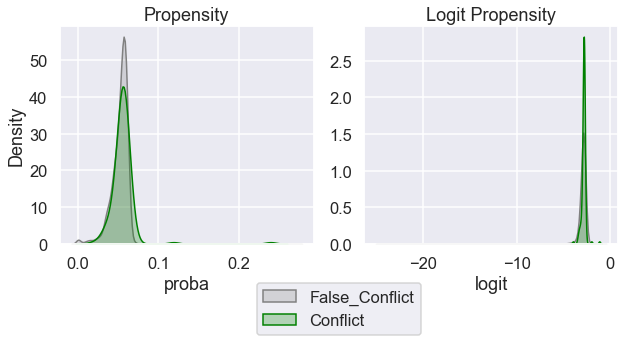

In [178]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
# Visualise propensity
sns.kdeplot(data=df[~df[Conflict]], x='proba', shade=True,
            color=C_COLOUR, label=C_LABEL, ax=ax[0])
sns.kdeplot(data=df[df[Conflict]], x='proba', shade=True,
            color=T_COLOUR, label=T_LABEL, ax=ax[0])
ax[0].set_title('Propensity')
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3))
# Visualise logit propensity
sns.kdeplot(data=df[~df[Conflict]], x='logit', shade=True,
            color=C_COLOUR, label=C_LABEL, ax=ax[1])
sns.kdeplot(data=df[df[Conflict]], x='logit', shade=True,
            color=T_COLOUR, label=T_LABEL, ax=ax[1])
ax[1].set_title('Logit Propensity')
ax[1].set_ylabel("");

## STEP 3: MATCH RECORDS

In [179]:

# Sort by 'logit' so it's quicker to find match
df.sort_values('logit', inplace=True)
n = len(df)-1

In [180]:
for i, (ind, row) in enumerate(df.iterrows()):
    # Match the most similar untreated record to each treated record
    above = df.iloc[i:]
    control_above = above[~above[Conflict]]
    match_above = control_above.iloc[0]

    distance_above = match_above['logit'] - row['logit']


    if row[Conflict]:
            # Find the closest untreated match among records sorted
            # higher. 'equal_or_above would' be more accurate but
            # used 'above' for brevity
            if i<n:
                above = df.iloc[i:]
                control_above = above[~above[Conflict]]
                match_above = control_above.iloc[0]
                distance_above = match_above['logit'] - row['logit']
                df.loc[ind, 'match'] = match_above.name
                df.loc[ind, 'distance'] = distance_above

            # Find the closest untreated match among records sorted
            # lower. 'equal_or_below' would be more accurate but
            # used 'below' for brevity
            if i>0:
                below = df.iloc[:i-1]
                control_below = below[~below[Conflict]]
                match_below = control_below.iloc[-1]
                distance_below = match_below['logit'] - row['logit']
                if i==n:
                    df.loc[ind, 'match'] = match_below.name
                    df.loc[ind, 'distance'] = distance_below

                # Only overwrite if match_below is closer than match_above
                elif distance_below<distance_above:
                    df.loc[ind, 'match'] = match_below.name
                    df.loc[ind, 'distance'] = distance_below
df[df[Conflict]]

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt,proba,logit,pred,match,distance
1385,10.00,True,True,True,10000,1.00,0.09,466.80,5044000.00,0.02,-3.97,0,214.00,-0.12
597,22.00,True,False,False,1968386000,1.73,0.08,0.97,4343611000.00,0.03,-3.50,0,1420.00,-0.01
626,20.50,True,False,False,971191000,1.29,0.00,0.86,2538213000.00,0.03,-3.42,0,2035.00,-0.03
479,31.00,True,False,False,17671000,31.09,-1.03,-0.01,568000.00,0.03,-3.39,0,1708.00,-0.00
625,20.50,True,False,True,1009015000,1.27,0.01,0.51,2449227000.00,0.03,-3.33,0,352.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,4.50,True,True,True,5543000,1.18,0.14,0.34,27087000.00,0.06,-2.68,0,1396.00,-0.00
913,4.50,True,True,True,452000,2.01,0.16,0.02,446000.00,0.06,-2.68,0,135.00,-0.00
603,18.50,True,True,True,15000,1.01,0.12,-110.13,1637000.00,0.07,-2.57,0,1076.00,-0.03
637,13.50,True,False,True,11000,0.99,0.00,-420.36,43515000.00,0.12,-2.00,0,848.00,-0.12


In [181]:
indices = df[df['match'].notna()].index. \
    append(pd.Index(df.loc[df['match'].notna(), 'match']))
matched_df = df.loc[indices].reset_index(drop=True)
matched_df

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt,proba,logit,pred,match,distance
0,10.00,True,True,True,10000,1.00,0.09,466.80,5044000.00,0.02,-3.97,0,214.00,-0.12
1,22.00,True,False,False,1968386000,1.73,0.08,0.97,4343611000.00,0.03,-3.50,0,1420.00,-0.01
2,20.50,True,False,False,971191000,1.29,0.00,0.86,2538213000.00,0.03,-3.42,0,2035.00,-0.03
3,31.00,True,False,False,17671000,31.09,-1.03,-0.01,568000.00,0.03,-3.39,0,1708.00,-0.00
4,20.50,True,False,True,1009015000,1.27,0.01,0.51,2449227000.00,0.03,-3.33,0,352.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,5.00,False,True,True,986000,0.38,0.02,-1.58,13273000.00,0.06,-2.69,0,NaN,NaN
268,5.00,False,True,True,-29000,0.85,-0.37,-1.90,184000.00,0.06,-2.68,0,NaN,NaN
269,10.50,False,True,True,10000,1.01,0.07,-59.30,1339000.00,0.07,-2.60,0,NaN,NaN
270,15.50,False,False,True,22003589000,2.74,-0.02,0.57,23670323000.00,0.11,-2.12,0,NaN,NaN


## STEP 4: EVALUATE THE QUALITY OF THE MATCHED RECORDS


In [182]:
COLUMNS = ['Company_year', 'Size_company','T','Capital','Clr','Ndter','Total_debt', Returns]
matches = pd.merge(df.loc[df[Conflict], COLUMNS+['match']],
                   df[COLUMNS], left_on='match',
                   right_index=True,
                   how='left', suffixes=('_t', '_c'))
matches

,Company_year_t,Size_company_t,T_t,Capital_t,Clr_t,Ndter_t,Total_debt_t,Returns_t,match,Company_year_c,Size_company_c,T_c,Capital_c,Clr_c,Ndter_c,Total_debt_c,Returns_c
1385,10.00,True,True,10000,1.00,466.80,5044000.00,0.09,214.00,5.00,True,True,10726000,1.08,525.95,207756000.00,0.41
597,22.00,False,False,1968386000,1.73,0.97,4343611000.00,0.08,1420.00,21.00,False,False,-474490000,0.21,-2.10,1144600000.00,-0.34
626,20.50,False,False,971191000,1.29,0.86,2538213000.00,0.00,2035.00,23.50,False,True,218440000,1.22,0.87,1922295000.00,0.02
479,31.00,False,False,17671000,31.09,-0.01,568000.00,-1.03,1708.00,21.00,False,False,95278000,1.29,7.62,931260000.00,-0.03
625,20.50,False,True,1009015000,1.27,0.51,2449227000.00,0.01,352.00,17.00,False,True,102974000,0.80,3.01,1477814000.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,4.50,True,True,5543000,1.18,0.34,27087000.00,0.14,1396.00,5.00,True,True,986000,0.38,-1.58,13273000.00,0.02
913,4.50,True,True,452000,2.01,0.02,446000.00,0.16,135.00,5.00,True,True,-29000,0.85,-1.90,184000.00,-0.37
603,18.50,True,True,15000,1.01,-110.13,1637000.00,0.12,1076.00,10.50,True,True,10000,1.01,-59.30,1339000.00,0.07
637,13.50,False,True,11000,0.99,-420.36,43515000.00,0.00,848.00,15.50,False,True,22003589000,2.74,0.57,23670323000.00,-0.02


In [183]:
for var in ['logit', 'Company_year']:
    print(f"{var} | Before matching")
    display(df.groupby(Conflict)[var].describe())
    print(f"{var} | After matching")
    display(matched_df.groupby(Conflict)[var].describe())

logit | Before matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,2464.00,-2.98,0.95,-24.45,-3.00,-2.85,-2.77,-0.99
True,136.00,-2.86,0.25,-3.97,-2.90,-2.82,-2.77,-1.16


logit | After matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,136.00,-2.86,0.23,-4.09,-2.90,-2.82,-2.77,-1.56
True,136.00,-2.86,0.25,-3.97,-2.90,-2.82,-2.77,-1.16


Company_year | Before matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,2464.00,13.76,7.30,3.00,8.00,12.00,18.00,81.50
True,136.00,12.97,6.17,4.00,8.00,12.50,16.12,31.00


Company_year | After matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,136.00,12.97,6.19,3.50,7.88,12.00,16.62,30.50
True,136.00,12.97,6.17,4.00,8.00,12.50,16.12,31.00


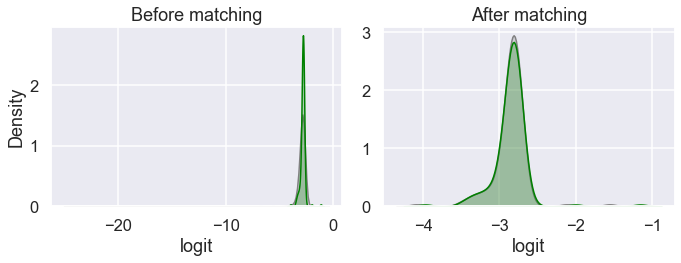

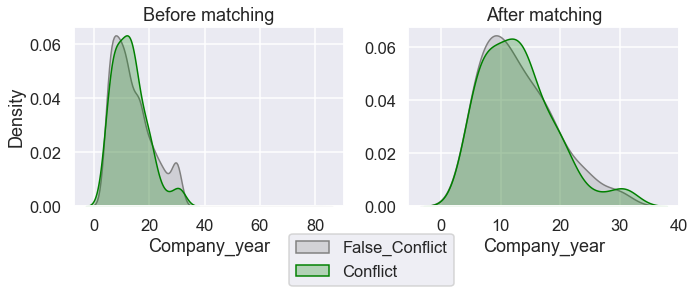

In [184]:
for var in ['logit', 'Company_year']:
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    # Visualise original distribution
    sns.kdeplot(data=df[~df[Conflict]], x=var, shade=True,
                color=C_COLOUR, label=C_LABEL, ax=ax[0])
    sns.kdeplot(data=df[df[Conflict]], x=var, shade=True,
                color=T_COLOUR, label=T_LABEL, ax=ax[0])
    ax[0].set_title('Before matching')

    # Visualise new distribution
    sns.kdeplot(data=matched_df[~matched_df[Conflict]], x=var,
                shade=True, color=C_COLOUR, label=C_LABEL, ax=ax[1])
    sns.kdeplot(data=matched_df[matched_df[Conflict]], x=var,
                shade=True, color=T_COLOUR, label=T_LABEL, ax=ax[1])
    ax[1].set_title('After matching')
    ax[1].set_ylabel("")
    plt.tight_layout()
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3));

In [185]:
print(f"{'is_Macro'} | Before matching")
display(pd.crosstab(df[Conflict], df['Size_company'],
                    normalize='index'))
print(f"{'is_Macro'} | After matching")
display(pd.crosstab(matched_df[Conflict], matched_df['Size_company'],
                    normalize='index'))

is_Macro | Before matching


Size_company,False,True
Conflict,,
False,0.18,0.82
True,0.12,0.88


is_Macro | After matching


Size_company,False,True
Conflict,,
False,0.09,0.91
True,0.12,0.88


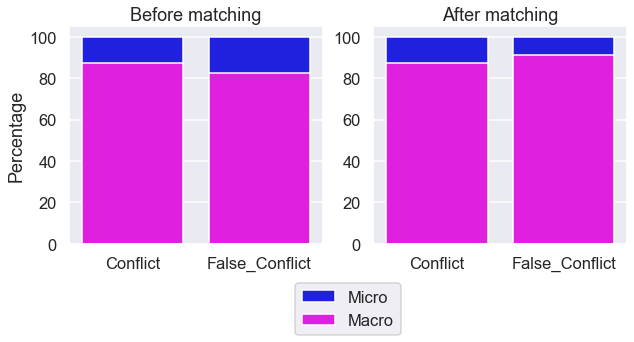

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# Visualise original distribution
sns.barplot(data=size_company, x=size_company.index.astype(str), y="All",
            color=M_COLOUR, label=M_LABEL, ax=ax[0])
sns.barplot(data=size_company, x=size_company.index.astype(str), y='Macro',
            color=F_COLOUR, label=F_LABEL, ax=ax[0])
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3))
ax[0].set_xlabel('')
ax[0].set_ylabel('Percentage')
ax[0].set_title('Before matching')
# Visualise new distribution
size_company_after = 100 * pd.crosstab(
    matched_df[Conflict].replace({True: T_LABEL, False: C_LABEL}),
    matched_df['Size_company'].replace({True: 'Macro', False: 'Micro'}),
    normalize='index'
)
size_company_after['All'] = 100
sns.barplot(data=size_company_after, x=size_company_after.index.astype(str),
            y="All", color=M_COLOUR, label=M_LABEL, ax=ax[1])
sns.barplot(data=size_company_after, x=size_company_after.index.astype(str),
            y='Macro', color=F_COLOUR, label=F_LABEL, ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_title('After matching')
ax[1].set_ylabel('');

## STEP 5: EVALUATE Conflict EFFECT ON THE Returns


In [191]:
matched_df.rename(columns = {'T':'Time'}, inplace = True )
matched_df.Size_company = matched_df.Size_company.replace({True: 1, False: 0})
matched_df.Time = matched_df.Time.replace({True: 1, False: 0})
matched_df.Conflict = matched_df.Conflict.replace({True: 1, False: 0})

matched_df.to_csv (r'Data\matched_df.csv', index= False )
